**Image Segmentation:** In computer vision, image segmentation is the process of partitioning an image into multiple segments. The goal of segmenting an image is to change the representation of an image into something that is more meaningful and easier to analyze. It is usually used for locating objects and creating boundaries.

It is not a great idea to process an entire image because many parts in an image may not contain any useful information. Therefore, by segmenting the image, we can make use of only the important segments for processing.

An image is basically a set of given pixels. In image segmentation, pixels which have similar attributes are grouped together. Image segmentation creates a pixel-wise mask for objects in an image which gives us a more comprehensive and granular understanding of the object.

**K Means Clustering Algorithm:**

K Means is a clustering algorithm. Clustering algorithms are unsupervised algorithms which means that there is no labelled data available. It is used to identify different classes or clusters in the given data based on how similar the data is. Data points in the same group are more similar to other data points in that same group than those in other groups.

K-means clustering is one of the most commonly used clustering algorithms. Here, k represents the number of clusters.

K-means clustering work –

Choose the number of clusters you want to find which is k.
Randomly assign the data points to any of the k clusters.
Then calculate the center of the clusters.
Calculate the distance of the data points from the centers of each of the clusters.
Depending on the distance of each data point from the cluster, reassign the data points to the nearest clusters.
Again calculate the new cluster center.
Repeat steps 4,5 and 6 till data points don’t change the clusters, or till we reach the assigned number of iterations.

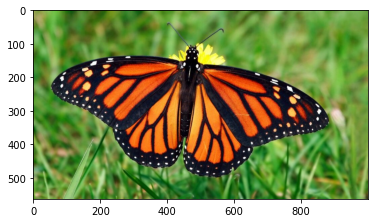

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
 
%matplotlib inline
 
# Read in the image
image = cv2.imread('image_1.jpg')
 
# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
 
plt.imshow(image)

Now we have to prepare the data for K means. The image is a 3-dimensional shape but to apply k-means clustering on it we need to reshape it to a 2-dimensional array.

In [3]:
# Reshaping the image into a 2D array of pixels and 3 color values (RGB)
pixel_vals = image.reshape((-1,3))
 
# Convert to float type
pixel_vals = np.float32(pixel_vals)

Taking k = 3, which means that the algorithm will identify 3 clusters in the image.



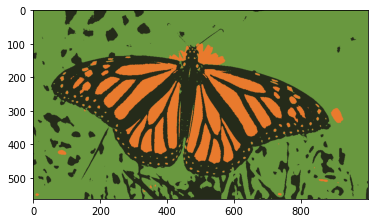

In [4]:
#the below line of code defines the criteria for the algorithm to stop running,
#which will happen is 100 iterations are run or the epsilon (which is the required accuracy)
#becomes 85%
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
 
# then perform k-means clustering wit h number of clusters defined as 3
#also random centres are initially choosed for k-means clustering
k = 3
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
 
# convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]
 
# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image.shape))
 
plt.imshow(segmented_image)

Now if we change the value of k to 10, we get the following Output

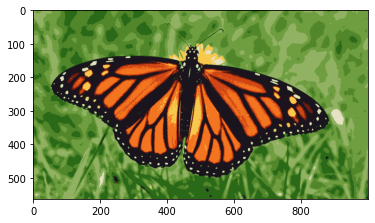

In [6]:
#the below line of code defines the criteria for the algorithm to stop running,
#which will happen is 100 iterations are run or the epsilon (which is the required accuracy)
#becomes 85%
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
 
# then perform k-means clustering wit h number of clusters defined as 3
#also random centres are initially choosed for k-means clustering
k = 10
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
 
# convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]
 
# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image.shape))
 
plt.imshow(segmented_image)

As you can see with an increase in the value of k, the image becomes clearer and distinct because the K-means algorithm can classify more classes/cluster of colors. K-means clustering works well when we have a small dataset. It can segment objects in images and also give better results. But when it is applied on large datasets (more number of images), it looks at all the samples in one iteration which leads to a lot of time being taken up.

